# 1. 기본 설정

In [1]:
# Library load
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

import keras_ocr

In [27]:


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
image_path_00 = work_dir + '/image00.jpg'
image_path_01 = work_dir + '/image01.jpg'
image_path_02 = work_dir + '/image02.jpg'
image_path_03 = work_dir + '/image03.jpg'
image_path_04 = work_dir + '/image04.jpg'
image_path_05 = work_dir + '/image05.jpg'
image_path_06 = work_dir + '/image06.jpg'
image_path_07 = work_dir + '/image07.jpg'
image_path_08 = work_dir + '/image08.jpg'
image_path_09 = work_dir + '/image09.jpg'
image_path_10 = work_dir + '/image10.jpg'
image_path_11 = work_dir + '/image11.png'
image_path_12 = work_dir + '/image12.png'
image_path_13 = work_dir + '/image13.png'
image_path_14 = work_dir + '/image14.jpg'
image_path_15 = work_dir + '/image15.jpg'
image_path_16 = work_dir + '/image16.jpg'
image_path_17 = work_dir + '/image17.png'
image_path_18 = work_dir + '/image18.jpg'
image_path_19 = work_dir + '/image19.jpg'

output_path= os.path.join(work_dir, '/output')


# 2. keras-ocr, Tesseract로 테스트 진행
- 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모음.

## (1) Tesseract

In [3]:
def crop_word_regions(image_path, output_path, language, custom_oem_psm_config):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=language,   
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(work_dir, output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

def recognize_images(cropped_image_path_list, language, custom_oem_psm_config):
       
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=language,    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")


In [33]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

img_file_path = image_path_19
language = 'eng'
custom_oem_psm_config_1 = r'--oem 3 --psm 3'
custom_oem_psm_config_2 = r'--oem 3 --psm 7'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, language, custom_oem_psm_config_1)
recognize_images(cropped_image_path_list, language, custom_oem_psm_config_2)

/aiffel/aiffel/ocr_python/0000.png

Done


## (2) keras_ocr

In [5]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [42]:
image_urls = [image_path_16,
              image_path_17,
              image_path_18,
              image_path_19,
              ]

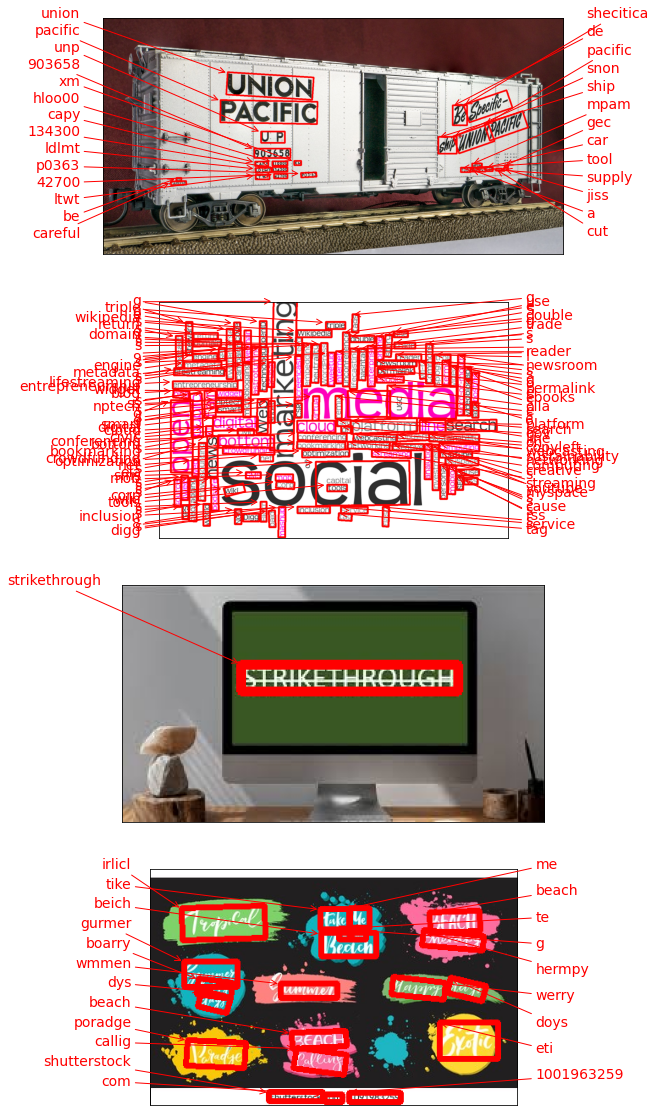

In [43]:
images = [keras_ocr.tools.read(url) for url in image_urls]

prediction_groups = [pipeline.recognize([url]) for url in image_urls]

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 3. 테스트 결과 정리
- 모듈마다 출력형태가 다르므로 분석을 위해 결과를 일목요연하게 정리해 보기.
- 가지고 있는 스마트폰의 OCR(삼성 Vixby vision)을 추가로 적용해 보았다.

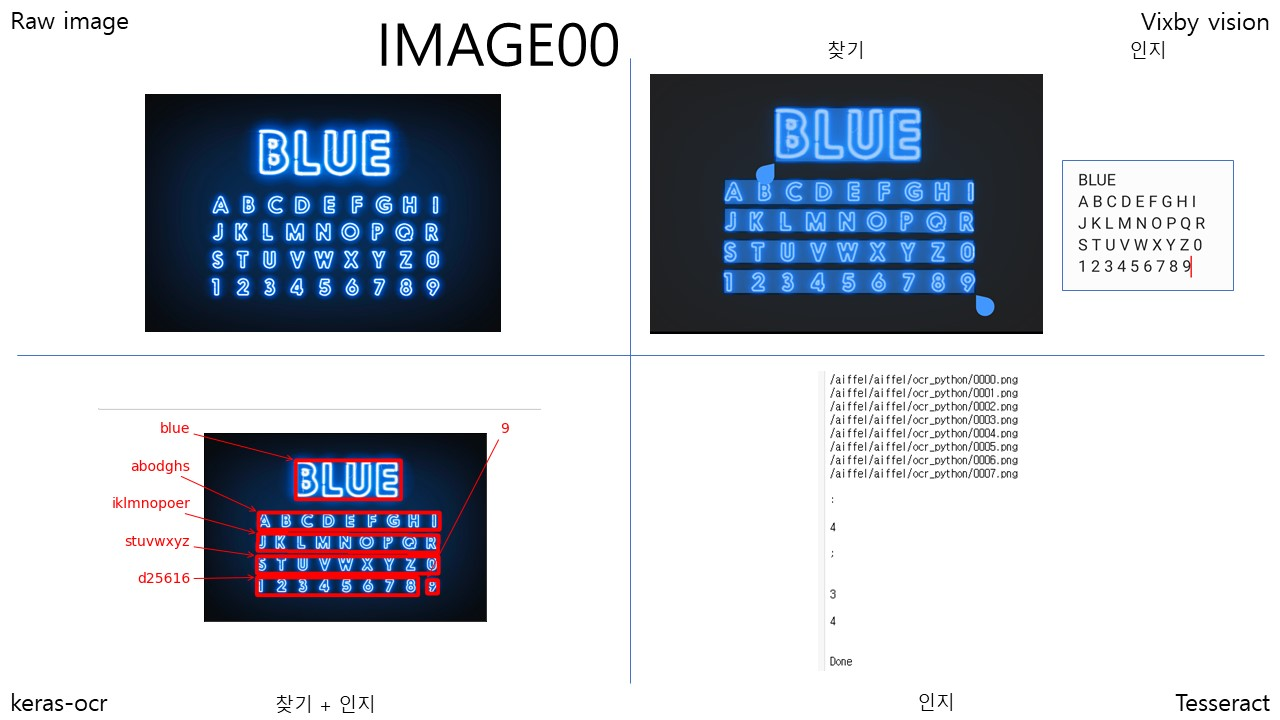
### Image 00
- Raw image: 특이사항 없음
- Vixby vision: 전부 완벽히 인지함.
- Keras-ocr: 틀린 부분이 많음.
- Tesseract: 거의 맞는게 없음.

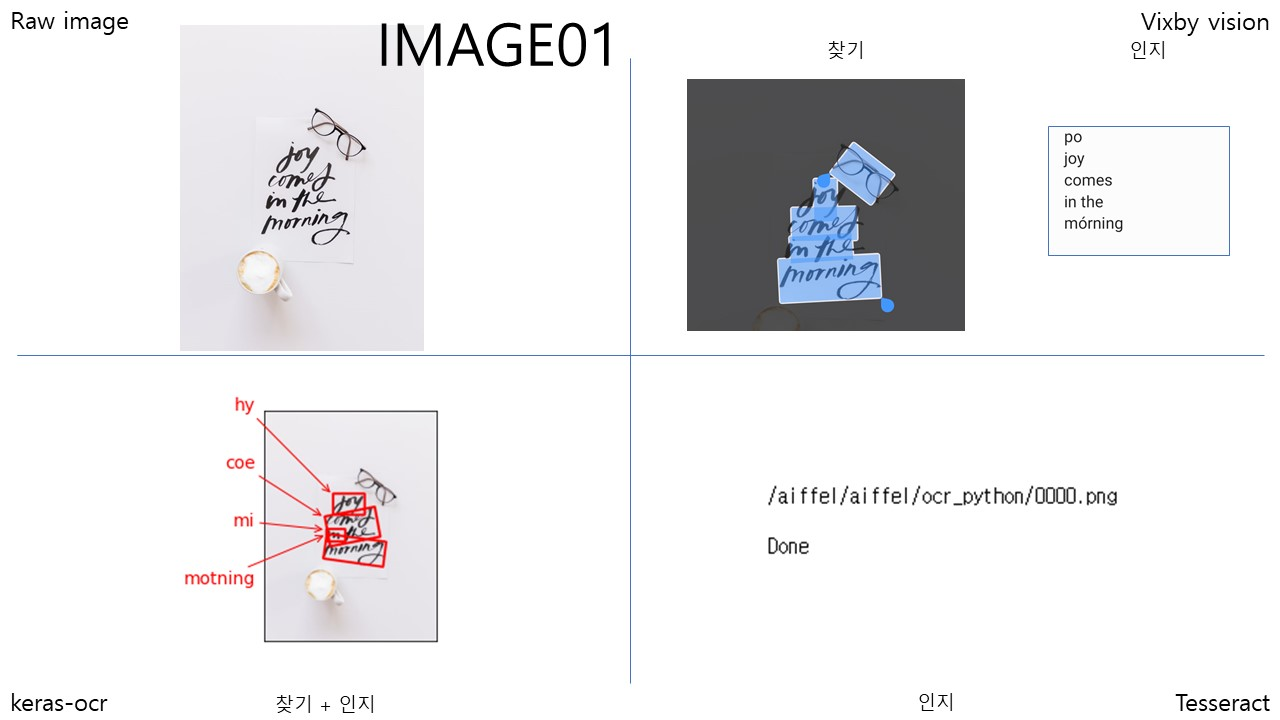
### Image 01
- Raw image: 손글씨. 각도 비스듬, 폰트 사이즈 차이.
- Vixby vision: 안경도 글씨로 인식(po) 문자는 거의 완벽.
- Keras-ocr: 낮은 정확도
- Tesseract: 인지를 아예 못함.

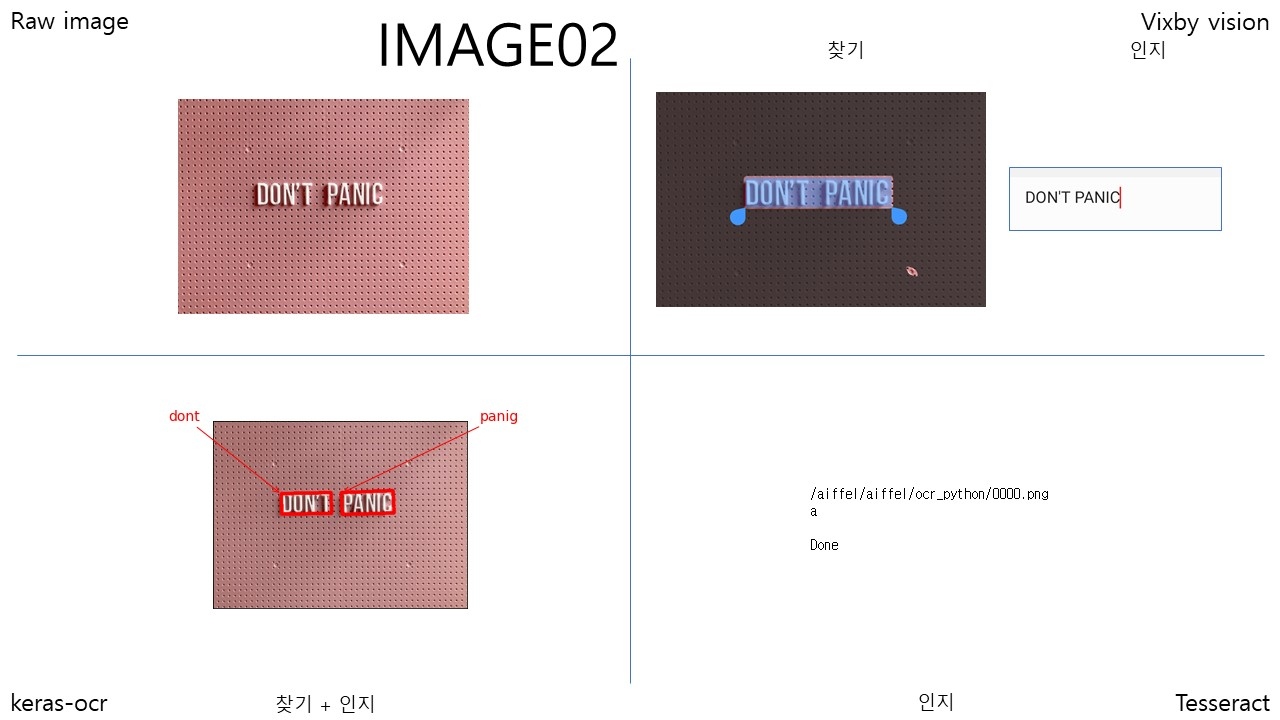
### Image 02
- Raw image: 입체 문자.
- Vixby vision: 완벽 인지.
- Keras-ocr: apostrophie 인지 못함, C를 G로 인지.
- Tesseract: 거의 틀림. 불가능에 가까움.

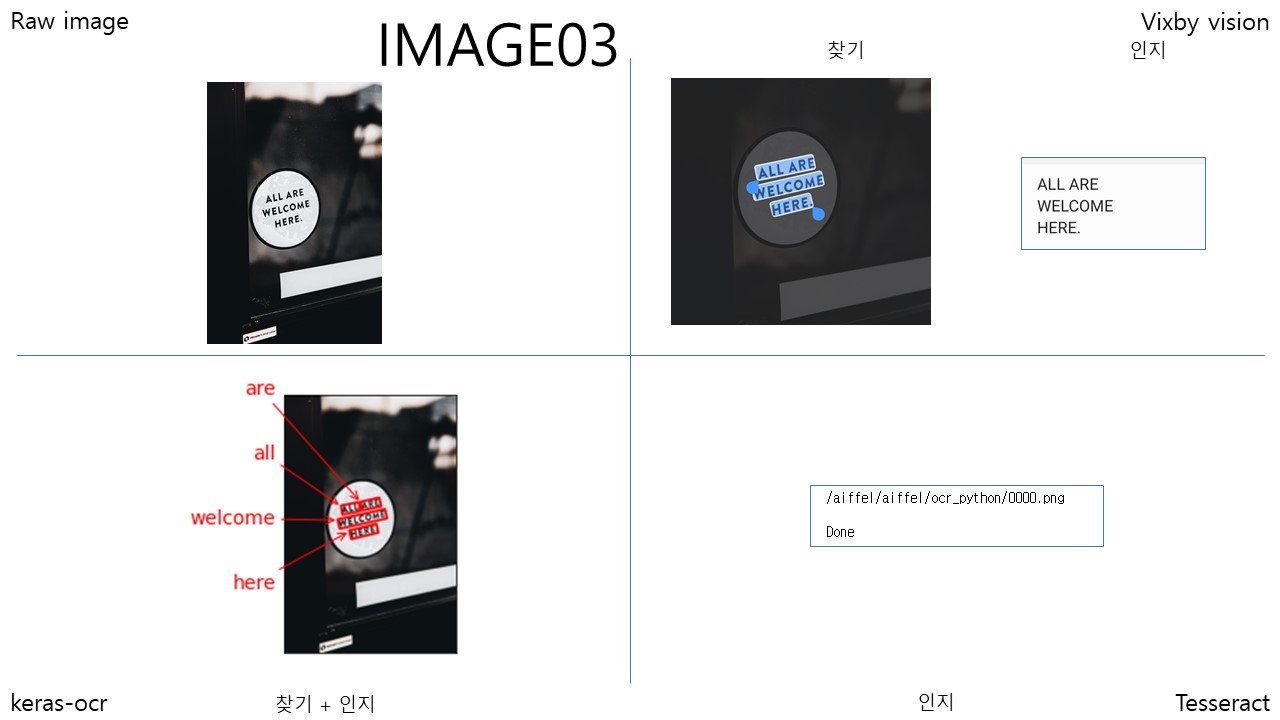
### Image 03
- Raw image: 비스듬한 각도.
- Vixby vision: 마침표까지 완벽인지.
- Keras-ocr: 마침표 인지 못함. 문자는 완벽.
- Tesseract: 인지를 아예 못함.

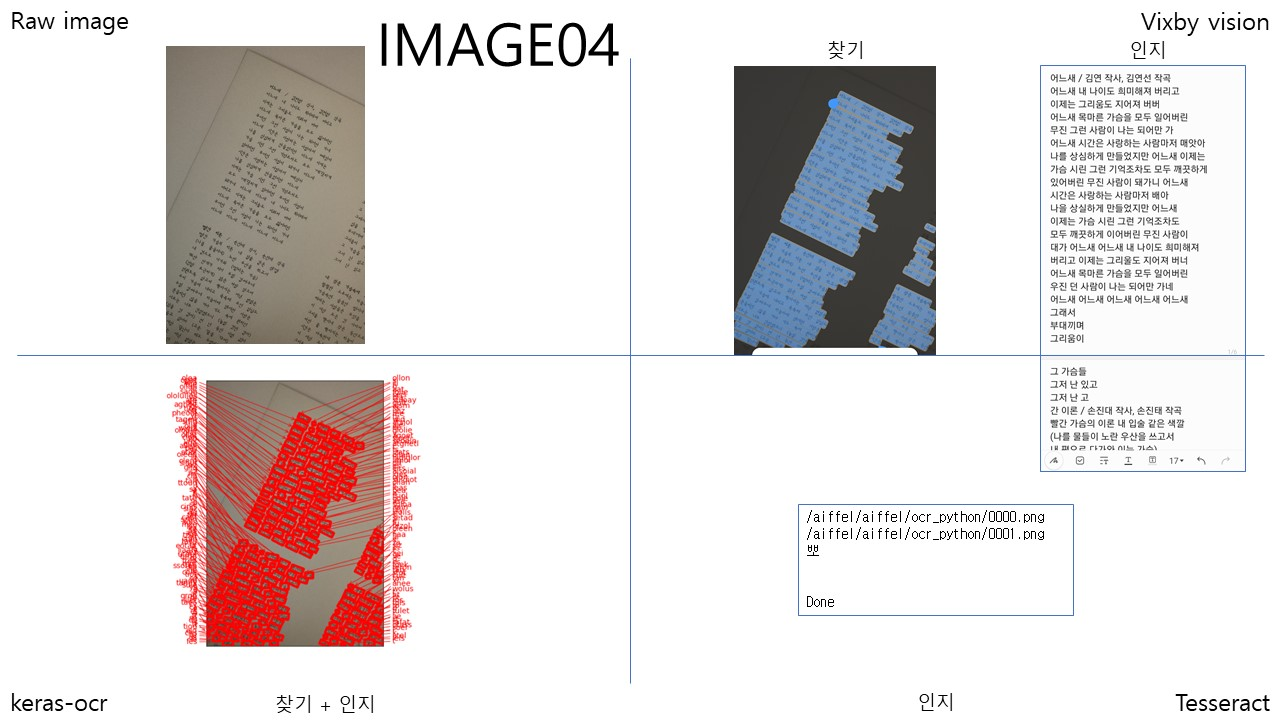
### Image 04
- Raw image:비스듬한 각도, 한글, 많은 글의 양.
- Vixby vision: 우수한 한글 인지, 대부분 완벽.
- Keras-ocr: 한글 인지 안됨. 영어로 인지하므로 전부 틀림.
- Tesseract: 한글로 바꿔 인지 시켰으나 찾기도 좋지 않고 그나마도 틀림.

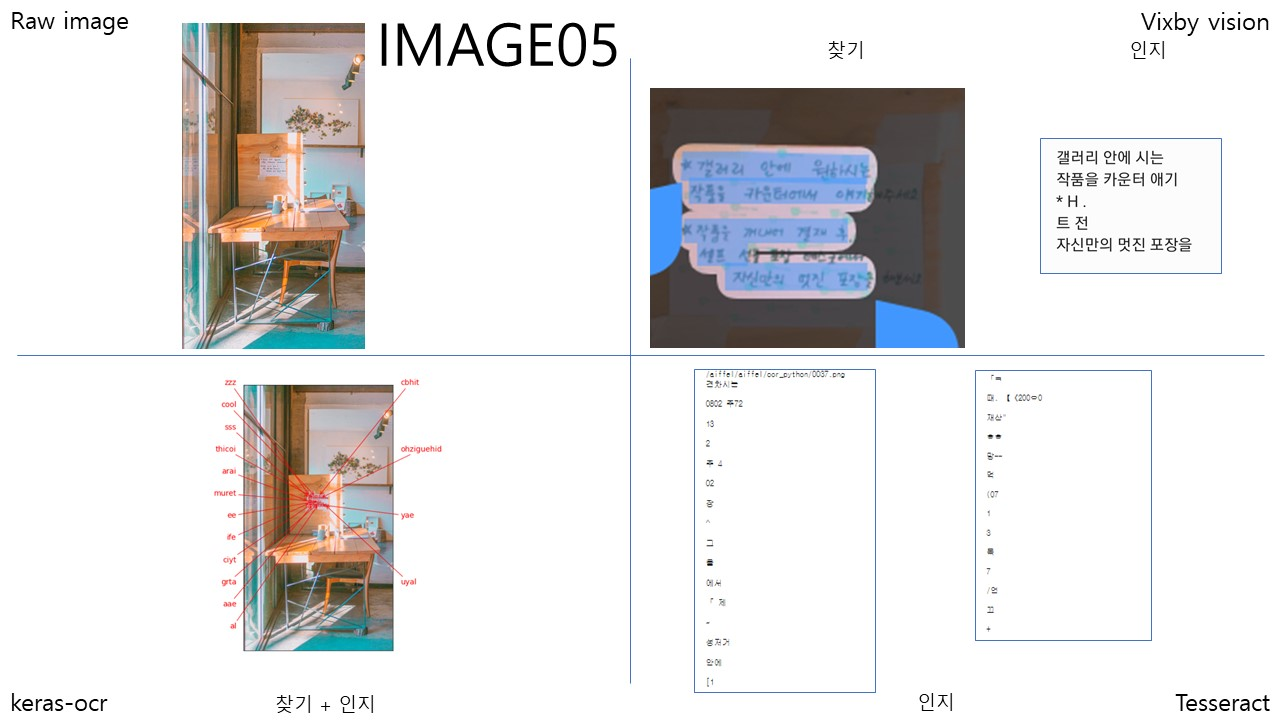
### Image 05
- Raw image: 한글, 작은 글씨 비중, 손글씨
- Vixby vision: 찾기가 좋지 않음. 뒷 부분에서 잘린 부분이 있어 인지에 한계가 있음.
- Keras-ocr: 한글 인지 안됨. 영어로 인지하므로 전부 틀림.
- Tesseract:한글로 바꿔 인지 시켰으나 조각조각 찾아짐. 전부 틀림.

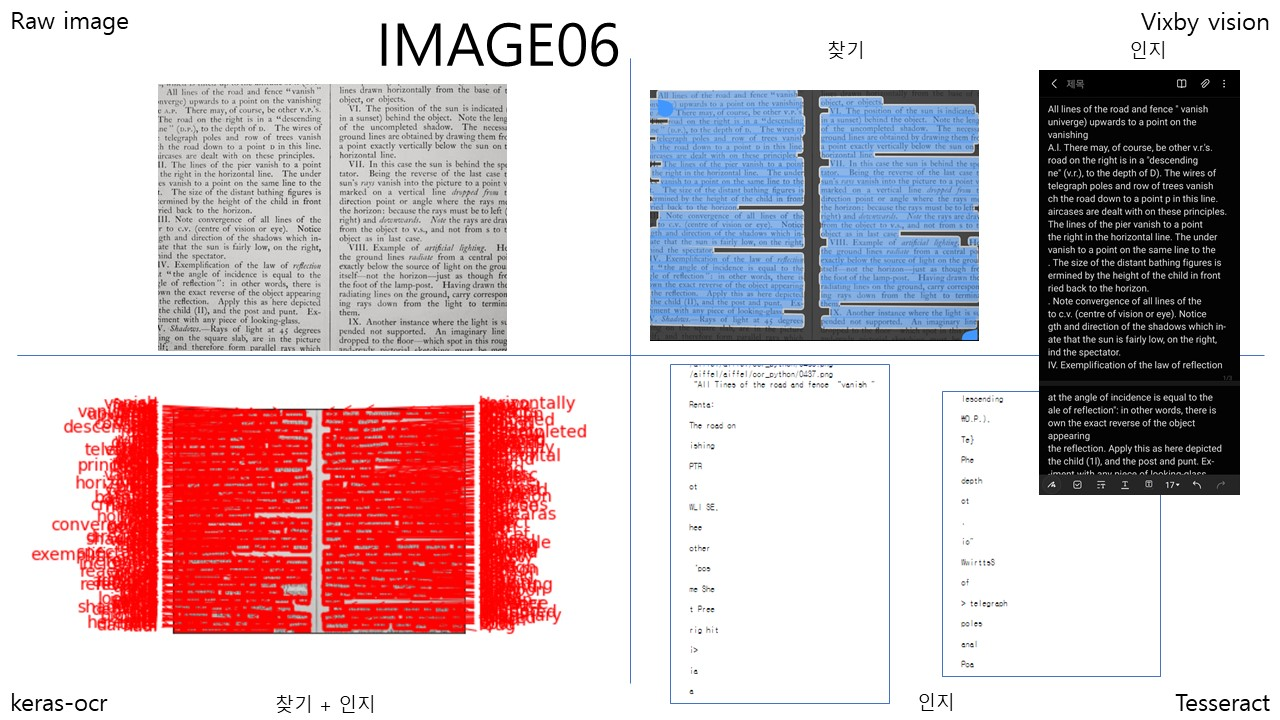
### Image 06
- Raw image: 양이 매우 많음.
- Vixby vision: 상당히 정확함.
- Keras-ocr: 대부분 찾기가 되고 인지도 좋은 편. 
- Tesseract: 찾기는 많이 되나 인지는 거의 틀림.

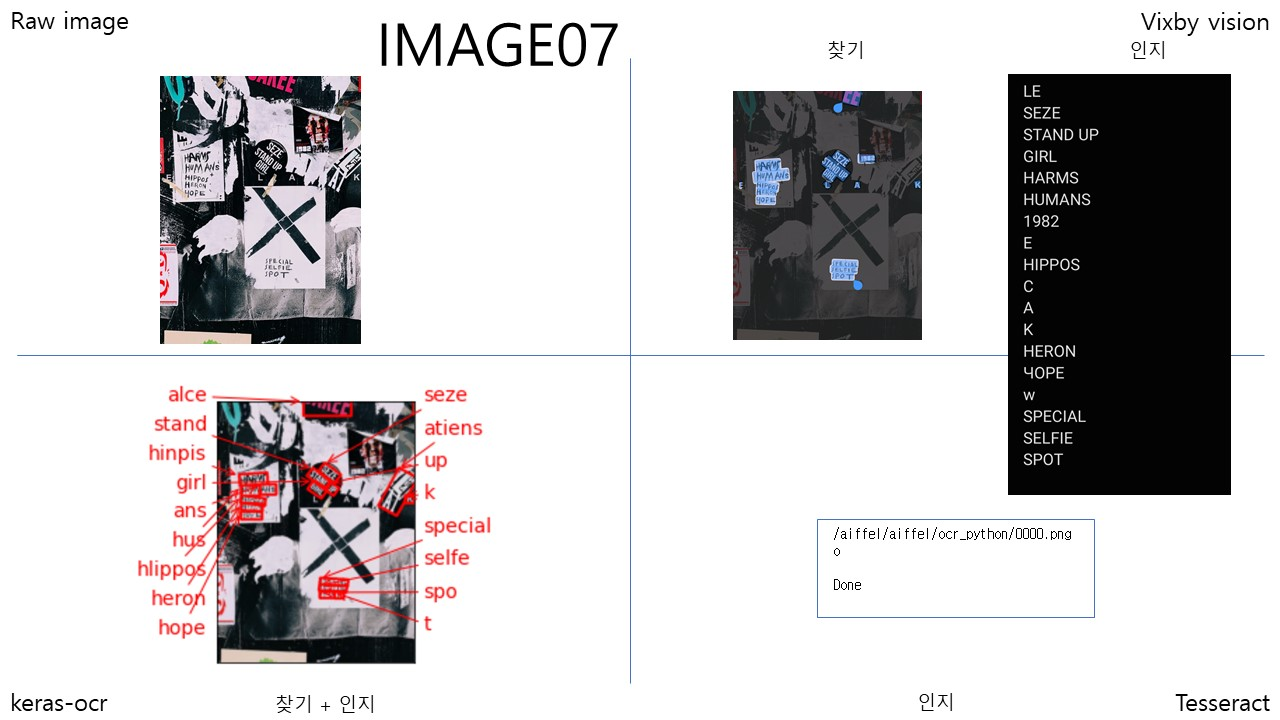
### Image 07
- Raw image: 손글씨. 비스듬한 각도. 배경 노이즈.
- Vixby vision: 틀린 것도 있으나 비교적 정확함.
- Keras-ocr: 몇 개만 맞추고 비교적 부정확함.
- Tesseract: 찾기도 거의 안되고 인지는 다 틀림.

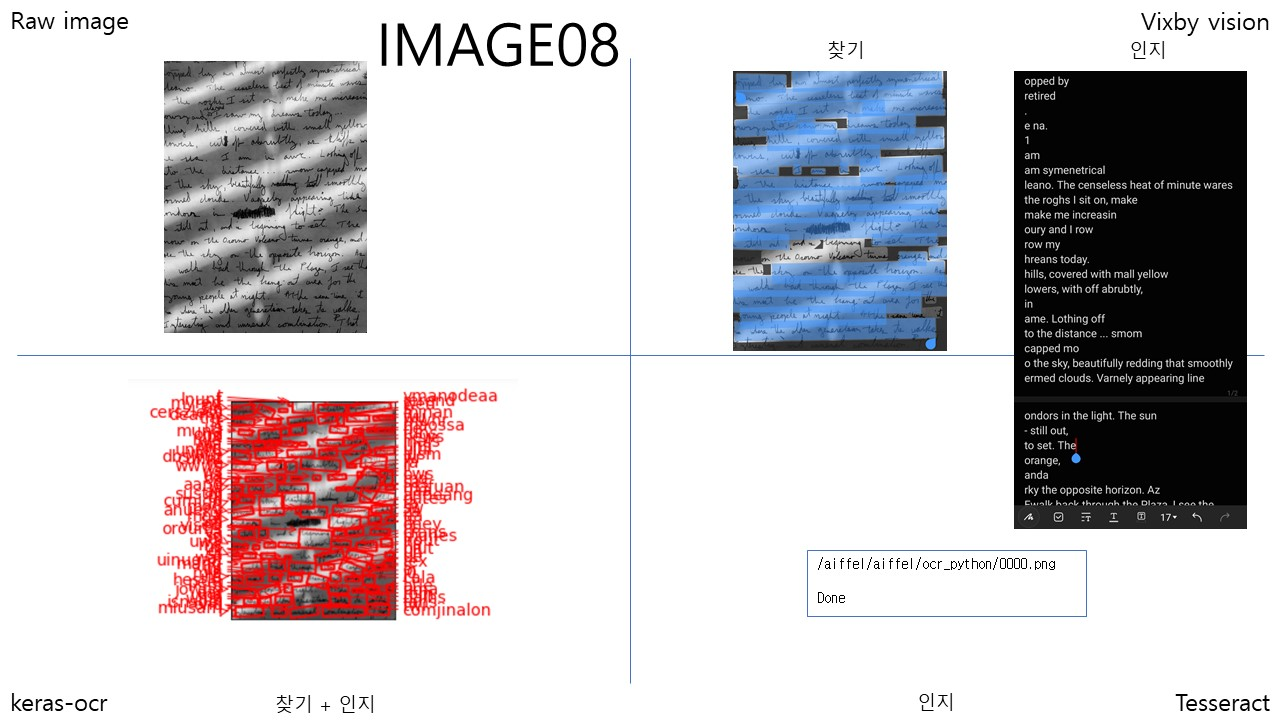
### Image 08
- Raw image: 비스듬한 각도, 손글씨, 배경 노이즈.
- Vixby vision: 간간이 찾기 안되는 부분 있음. 인지가 부정확한 부분도 종종 있음.
- Keras-ocr: 찾기는 많이 되나 인지가 거의 부정확함.
- Tesseract: 찾기 불능.

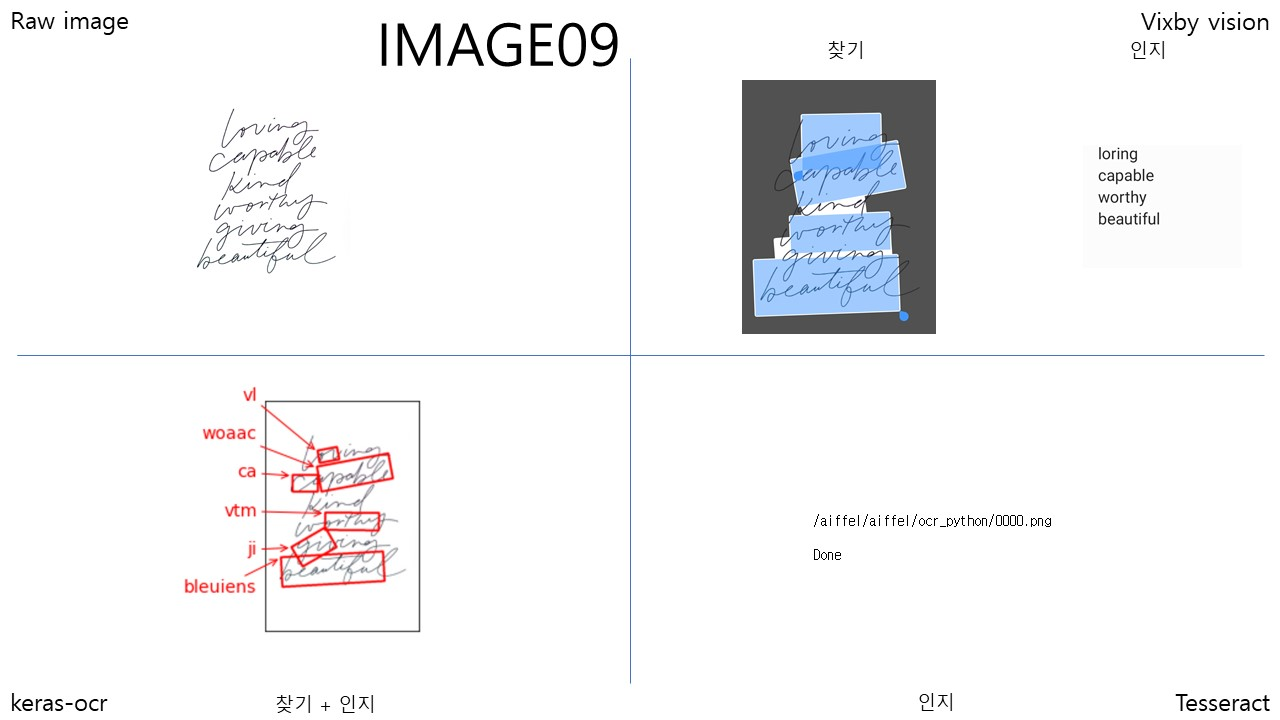
### Image 09
- Raw image: 손글씨
- Vixby vision: 찾기 안되는 부분 있음. 인지 비교적 정확함.
- Keras-ocr: 찾기 조각남. 인지 불능.
- Tesseract: 찾기 불능.

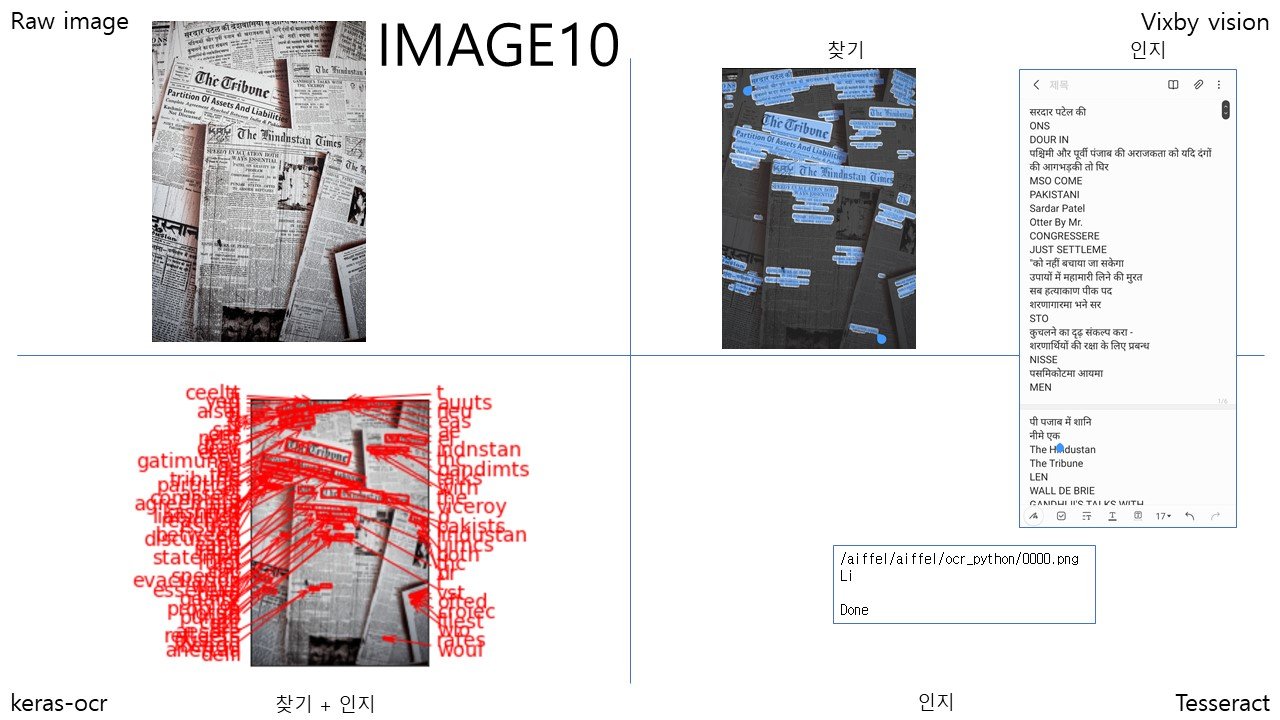
### Image 10
- Raw image: 영어가 아닌 외국어(힌두어 추정), 다량의 문자, 배경 노이즈
- Vixby vision: 대부분 큰 글자들만 찾기가 됨. 배경 노이즈 부분은 찾기가 잘 안됨. 외국어도 일부 인지함.
- Keras-ocr: 대부분 큰 글자들만 찾기가 됨. 배경 노이즈 부분은 찾기가 잘 안됨. 영어로 인지해서 대부분 틀림.
- Tesseract: 찾기 거의 불능. 인지 불능.

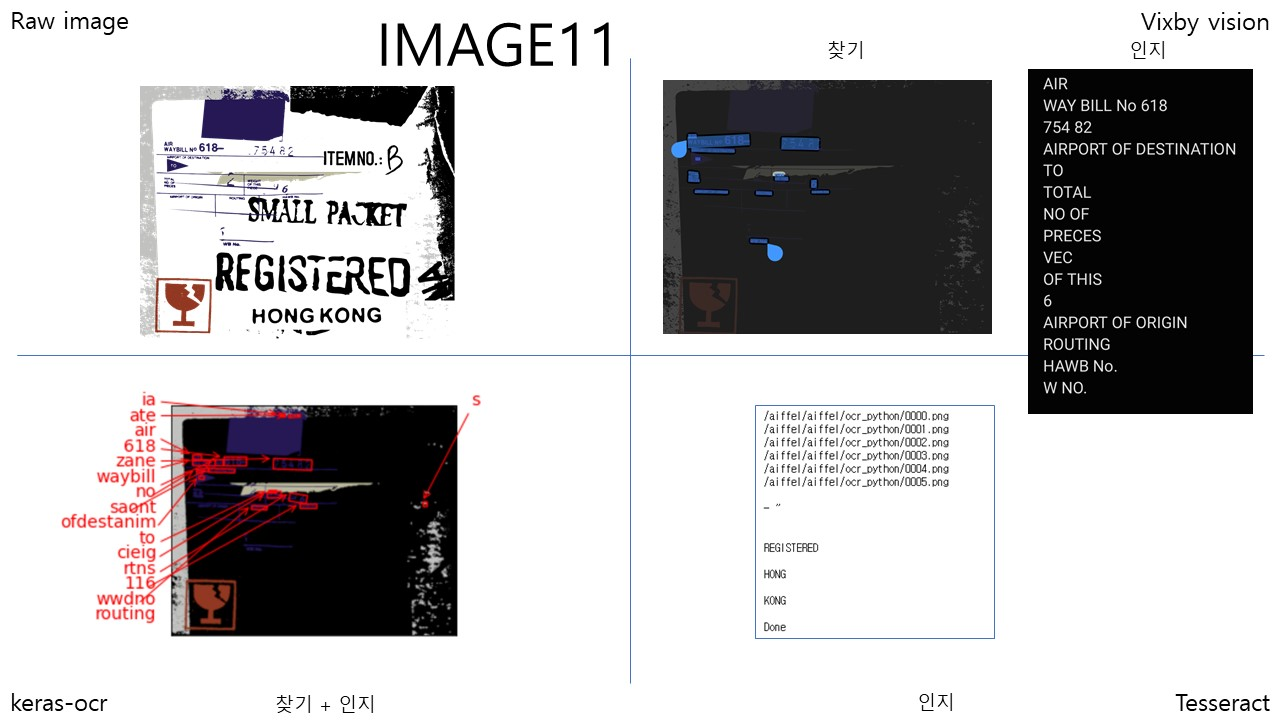
### Image 11
- Raw image: 손글씨, 글씨 일부 지워짐, 배경 노이즈
- Vixby vision: 글씨 일부 지워진 부분 찾기 못함. 탐지된 곳은 비교적 잘 인지.
- Keras-ocr: 글씨 일부 지워진 부분 찾기 못함. 깔끔한 글씨만 인지.
- Tesseract: 일부 인쇄 글씨만 찾기 성공. 반 이상 인지함.

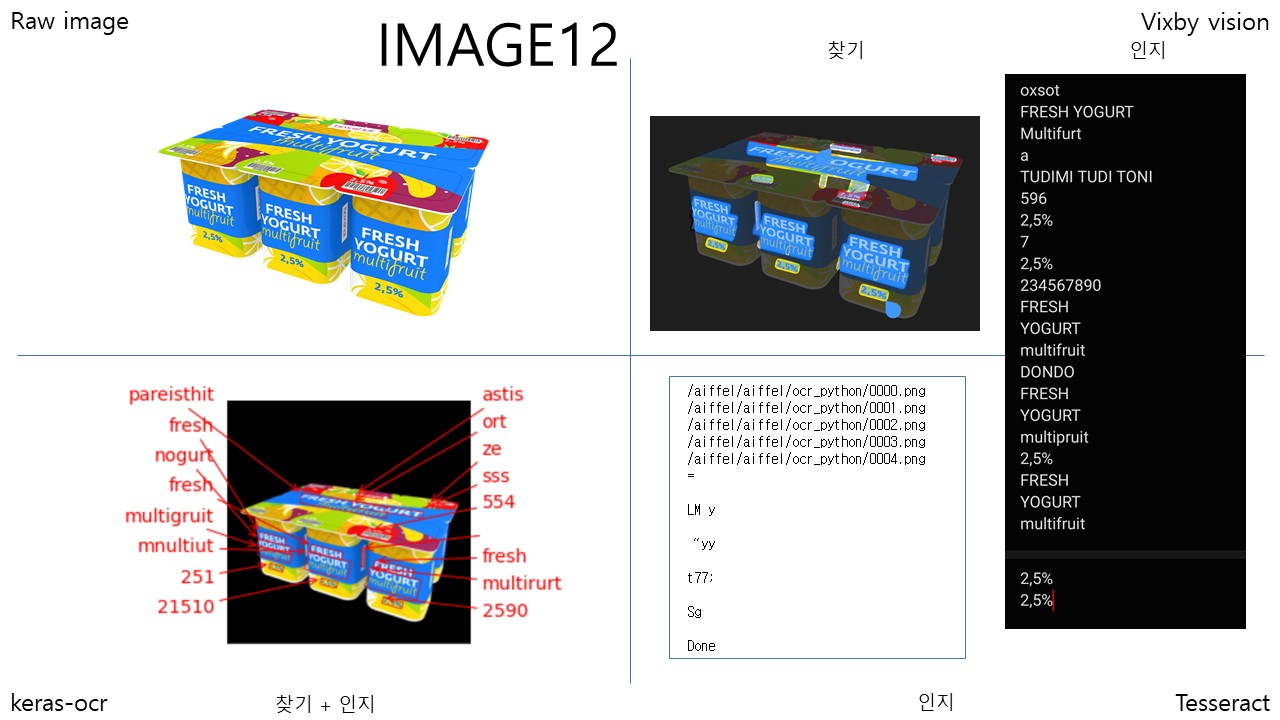
### Image 12
- Raw image: 글씨간 침범, 비스듬한 각도
- Vixby vision: 글씨간 침범된 것도 훌륭히 탐지하고 인지함.
- Keras-ocr: 글씨간 침범된 부분은 찾지 못함. 찾은 부분은 대부분 부정확함.
- Tesseract: 일부 찾았으나 전부 인지 불능.

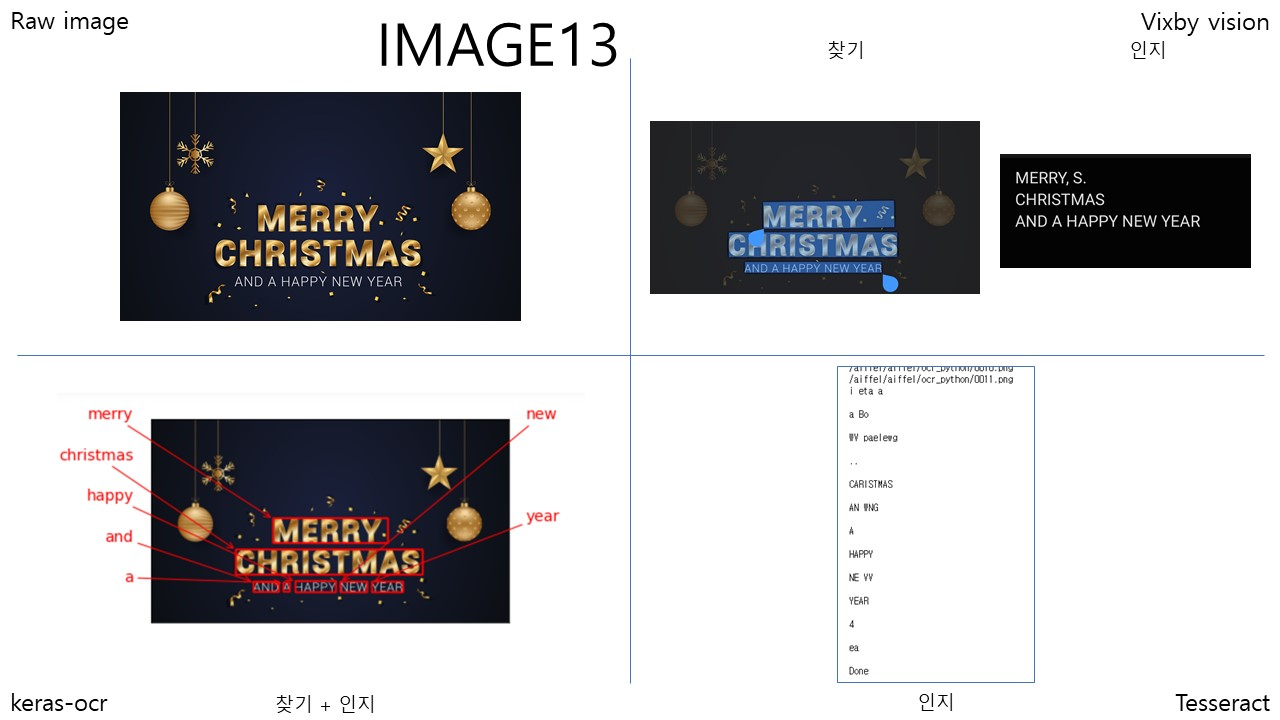
### Image 13
- Raw image: 글씨의 색깔 일정하지 않음.
- Vixby vision: 전부 찾고 인지함.
- Keras-ocr: 전부 찾고 인지함.
- Tesseract: 해당 없는 부분도 찾음. 인지는 맞는 부분도 있으나 대부분 부정확.

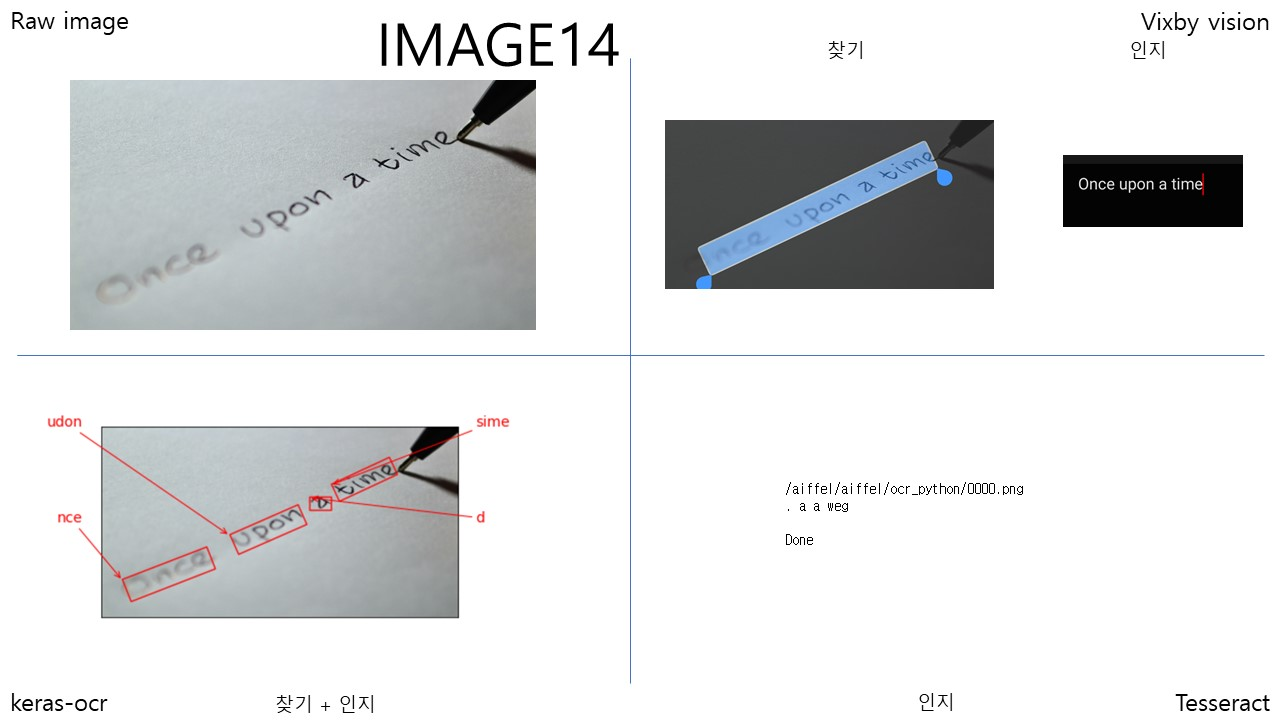
### Image 14
- Raw image: 흐릿한 글씨, 비스듬한 각도
- Vixby vision: 정확히 찾고 인지함.
- Keras-ocr: 흐릿한 부분 못찾음, 비스듬한 각도 틀리게 인지.
- Tesseract: 거의 못찾음. 인지 불능.

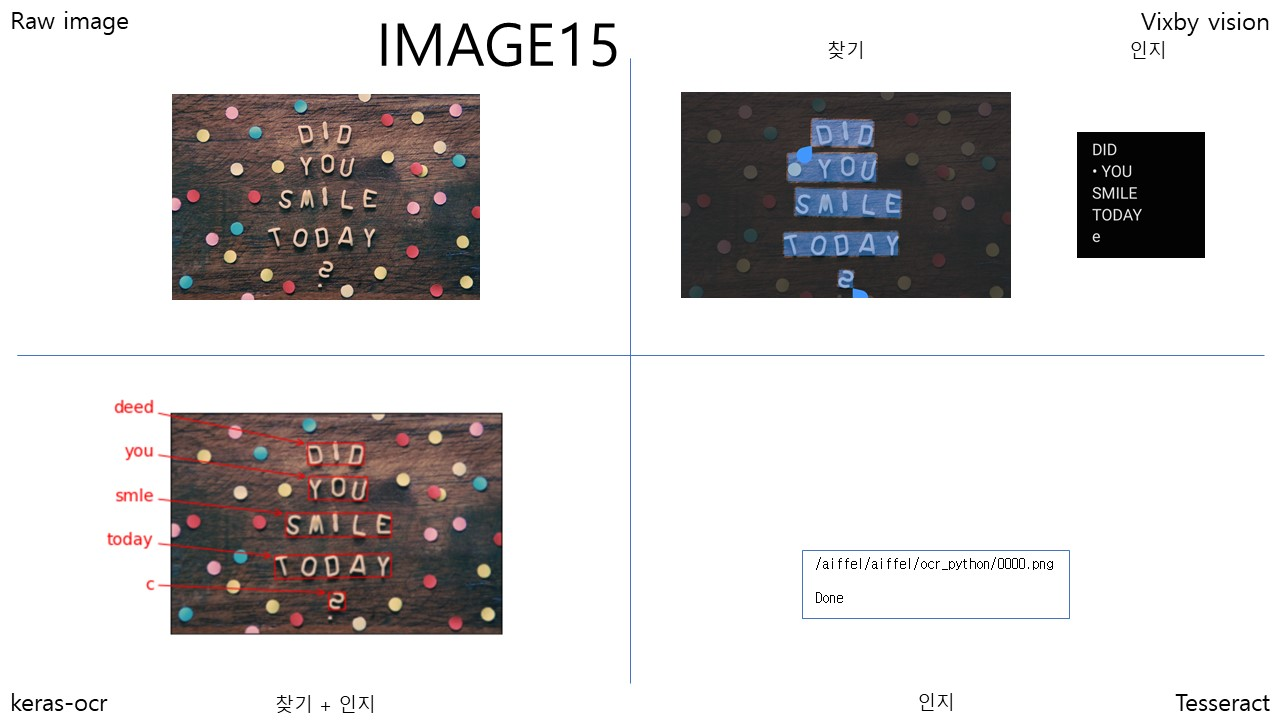
### Image 15
- Raw image: 글씨별 각도 다름, 물음표 모양 다름, 배경 노이즈
- Vixby vision: 배경 노이즈를 글씨로 인지. 물음표를 문자로 인지함.
- Keras-ocr: 배경 노이즈 구분함. 글씨 인지는 일부 부정확. 물음표를 문자로 인지함.
- Tesseract: 찾기 불능.

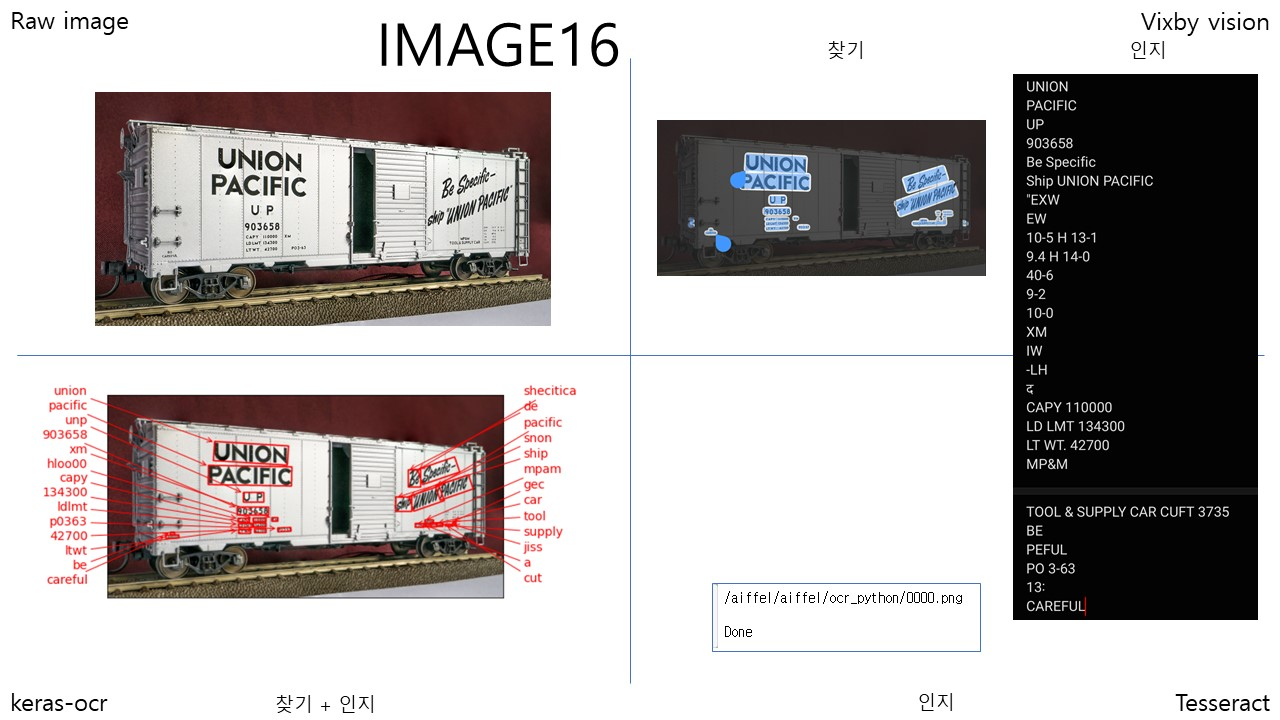
### Image 16
- Raw image: 비스듬한 글씨, 다른 글씨체, 문자와 숫자의 병기, 배경 노이즈
- Vixby vision: 배경 노이즈를 찾고 인지하여 부정확한 부분이 있음. 글씨는 대부분 정확히 인지.
- Keras-ocr: 찾기는 대부분 성공. 글씨(o)와 문자(0)를 잘 구분하지 못함. 인지는 비교적 부정확함.
- Tesseract: 찾기 불능.

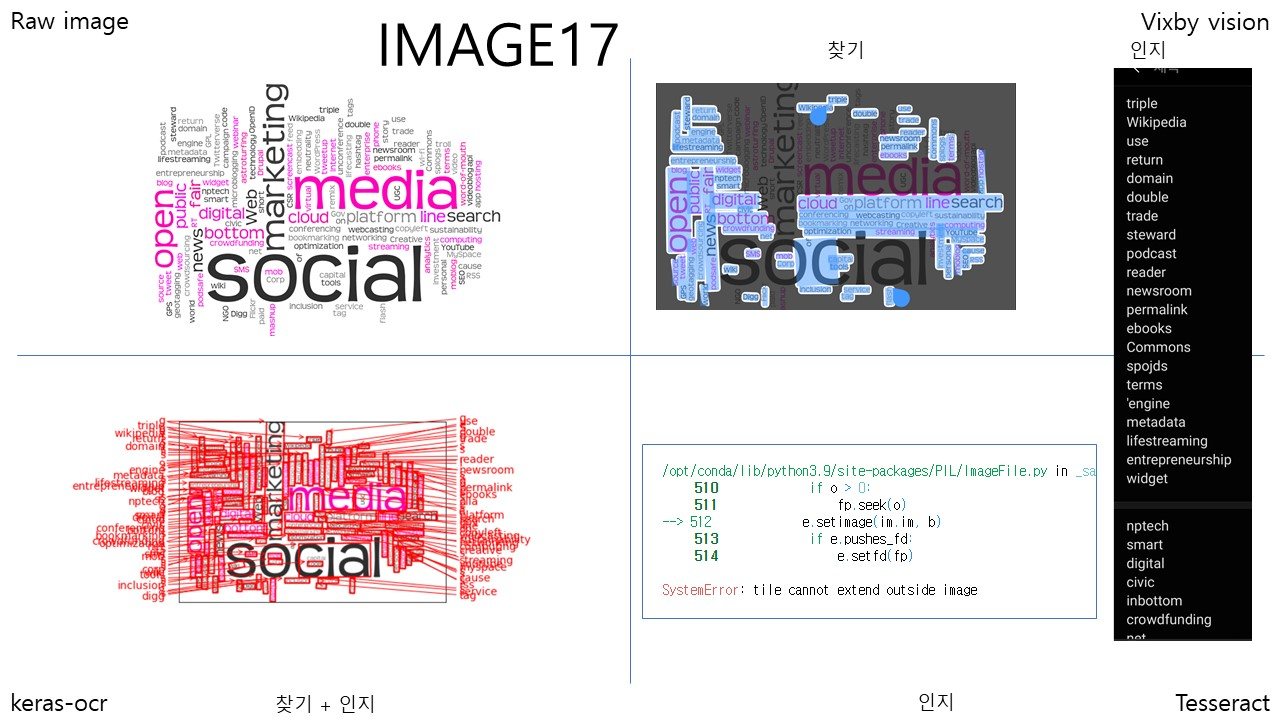
### Image 17
- Raw image: 세로글, 글씨별 크기 다름. 색깔 다름. 양 많음.
- Vixby vision: 찾지 못한 부분이 상당히 있고 세로글은 특히 많이 찾지 못함.
- Keras-ocr: 세로글에 대해 Vixby보다 더 나은 찾기를 보여줌. 인지는 정확한 편. 모든 샘플 통틀어 Vixby 보다 나은 퍼포먼스를 보였다.
- Tesseract: 아예 동작하지 않았다.

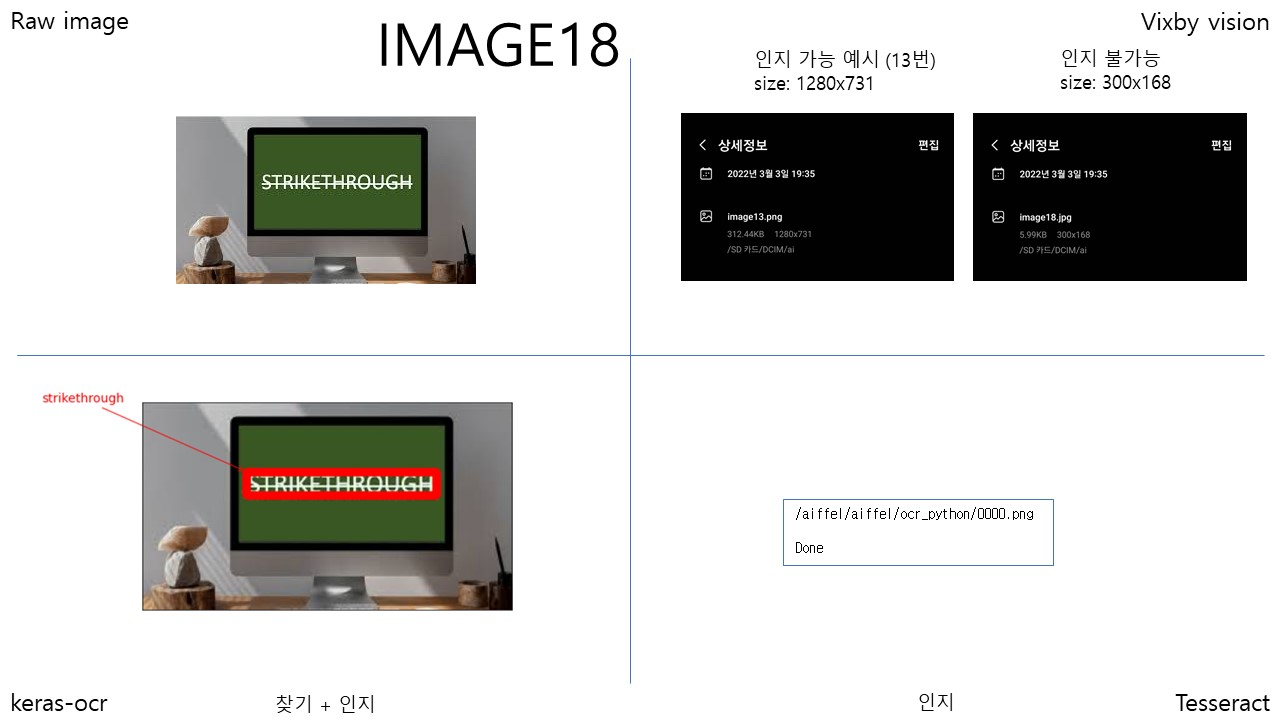
### Image 18
- Raw image: 글씨 노이즈
- Vixby vision: 이미지 사이즈가 작아 찾기 불가.
- Keras-ocr: 명확히 찾고 인지함. Vixby보다 나은 퍼포먼스.
- Tesseract: 응 안돼

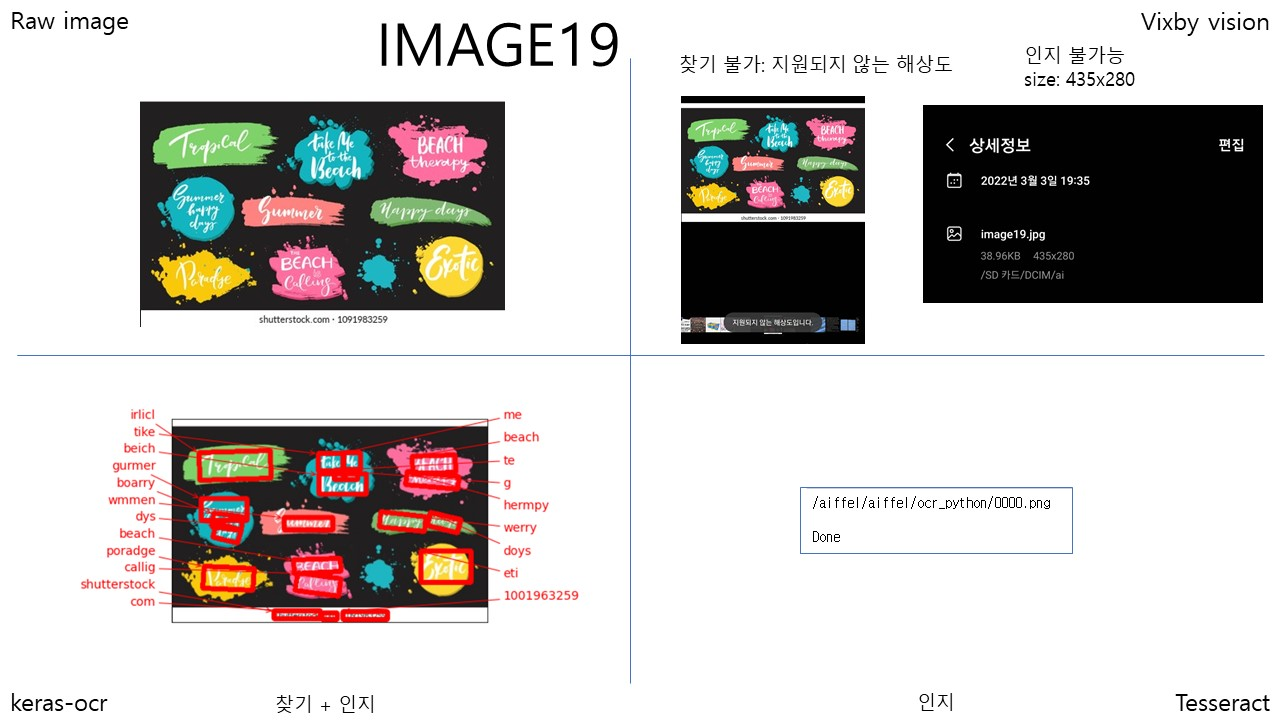
### Image 19
- Raw image: 손글씨 
- Vixby vision: 이미지 사이즈가 작아 찾기 불가.
- Keras-ocr: 전부 다 찾았으나 인지는 대부분 부정확함.
- Tesseract: 응 안돼

# 4. 결과 분석과 결론 제시

- 손글씨에 대한 찾기 및 인지는 상당히 취약한 모습을 보여주었다. 학습 데이터셋을 늘려야 할 것이다.
- 글씨의 각도가 달라짐에 따라 인지 정확도에 큰 차이가 있었다. 특히 image 17처럼 완전 세로는 불가한 것도 상당수 있다. 가상의 공간에서 이미지를 회전 변환해 가며 추가 탐지 시도를 하는 방식이 필요할 것 같다.
- Vixby는 찾기를 할 수 있는 최저 해상도의 한계가 있음을 확인하였다. image 18의 keras-ocr을 보면 좀 더 낮춰도 괜찮을 것 같다.
- 글씨를 낱자 단위로 인지하는 것 같다. 단어 단위로 인지하는 NLP 모듈도 추가한다면, 배경 노이즈 등으로 인해 발생하는 중간 글씨 오타도 수정해 올바르게 인지할 가능성이 높아질 것으로 생각된다.
- keras-ocr은 영어 이외의 언어 인지가 불가능했다. 기타 외국어 모듈이 추가되어야 한다.
- Vixby에서 흐릿한 글씨 잘 찾는 게 인상적이었다. 필터링 테크닉이 들어갔겠지.
- 세 모듈 중 Vixby가 가장 좋았다. 역시 상용이 짱이야. 테서렉트는.. RIP. 관 뚜껑 닫자.

# 마침